# Importing Necessary Libraries

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loading and Preprocessing Data

In [36]:
file_path = '20241017121452-international indices.txt'
df = pd.read_csv(file_path, encoding='big5', delimiter='\t')
df = df.iloc[1:]

                 證券代碼       年月日        指數      漲跌    漲跌幅%  週漲跌幅 %   月漲跌幅 %
1    SB03 美國紐約道瓊工業平均數  20000103  11357.50 -139.60 -1.2142 -0.2951   0.6317
2         SB05 香港恆生指數  20000103  17369.60  407.53  2.4026  3.1862   9.6541
3        SB08 德國DAX指數  20000103   6750.76 -207.38 -2.9804 -1.2674  10.3213
4  SB10 馬來西亞吉隆坡綜合股價指數  20000103    833.89   21.56  2.6541  6.1172  15.0780
5   SB11 菲律賓馬尼拉綜合股價指數  20000103   2141.77   -1.20 -0.0560  1.9857  10.5772


In [37]:
print(df.head())
print(df.columns)

Index(['證券代碼', '年月日', '指數', '漲跌', '漲跌幅%', '週漲跌幅 %', '月漲跌幅 %'], dtype='object')


In [38]:
filtered_df = df[['年月日', '漲跌幅%']]
average_df = filtered_df.groupby('年月日', as_index=False).mean()
vector = average_df['漲跌幅%'].to_numpy()
print("Filtered DataFrame:")
print(filtered_df)
print("\nGrouped and Averaged DataFrame:")
print(average_df)
print("\nVector:")
print(vector)

Filtered DataFrame:
             年月日    漲跌幅%
1       20000103 -1.2142
2       20000103  2.4026
3       20000103 -2.9804
4       20000103  2.6541
5       20000103 -0.0560
...          ...     ...
343799  20241016 -0.1863
343800  20241016  0.4460
343801  20241016 -0.3057
343802  20241016  0.6236
343803  20241016  0.5805

[343803 rows x 2 columns]

Grouped and Averaged DataFrame:
           年月日      漲跌幅%
0     20000103 -1.391155
1     20000104 -1.228341
2     20000105 -1.489622
3     20000106 -0.297250
4     20000107  1.515849
...        ...       ...
7785  20241011  0.128463
7786  20241013 -0.022950
7787  20241014  0.434009
7788  20241015 -0.302843
7789  20241016 -0.143327

[7790 rows x 2 columns]

Vector:
[-1.39115455 -1.22834054 -1.48962162 ...  0.43400877 -0.30284262
 -0.14332667]


In [39]:
next_20_rows = average_df.iloc[5290:5300]
print(next_20_rows)

           年月日      漲跌幅%
5290  20161027  0.165380
5291  20161028 -0.123215
5292  20161030 -0.444900
5293  20161031 -0.115496
5294  20161101 -0.132432
5295  20161102 -1.231150
5296  20161103  0.014229
5297  20161104 -0.451673
5298  20161106  0.369175
5299  20161107  0.939795


In [40]:
next_20_rows = average_df.iloc[4500:7000]
print(next_20_rows)

           年月日      漲跌幅%
4500  20140424 -0.040053
4501  20140425 -0.826417
4502  20140427 -0.296650
4503  20140428 -0.240076
4504  20140429  0.690068
...        ...       ...
6995  20220331 -0.201925
6996  20220401  0.438422
6997  20220403 -0.224400
6998  20220404  0.463631
6999  20220405 -0.497511

[2500 rows x 2 columns]


In [41]:
unique_data_count = df.drop_duplicates(subset='年月日').shape[0]
print(f"Number of unique data rows (no repetition in 年月日): {unique_data_count}")

Number of unique data rows (no repetition in 年月日): 7790


# Data Conversion and Storage

In [42]:
vector_df = pd.DataFrame(vector, columns=['daily return'])
vector_df.to_csv('vector_output.csv', index=False, encoding='utf-8-sig')

# Data Visualization

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28466 (\N{CJK UNIFIED IDEOGRAPH-6F32}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36300 (\N{CJK UNIFIED IDEOGRAPH-8DCC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


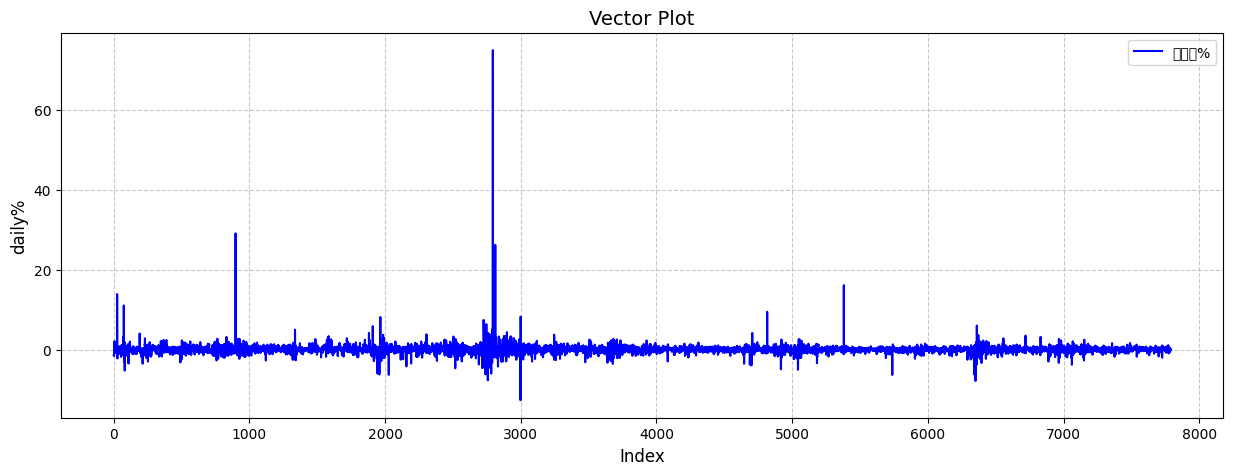

In [43]:
plt.figure(figsize=(15, 5))
plt.plot(vector, linestyle='-', color='b', label='漲跌幅%')
plt.title('Vector Plot', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('daily%', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()